In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [9]:
def plot(axes, x, y, title):
    axes.scatter(x, y, s=6)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [18]:
if recopilar_data:
    from importlib import reload
    reload(recopilar_data)
else:
    import recopilar_data
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw.head(10)

,size,job,temperature,energy,energy^2,magnetization,magnetization^2,amag
0,40,2,2.94,-1346.824056,1.819266e+06,-51.742802,2.125701e+04,51.742802
1,40,2,2.66,-1574.465771,2.485574e+06,-24.003839,3.237221e+04,24.003839
2,40,2,2.64,-1608.711452,2.595097e+06,47.709533,5.812052e+04,47.709533
3,40,2,1.86,-2932.007678,8.599283e+06,-1515.408829,2.296868e+06,1515.408829
4,40,2,2.50,-1773.211772,3.153664e+06,171.353807,1.235436e+05,171.353807
5,40,2,1.20,-3181.611004,1.012280e+07,-1595.218810,2.544734e+06,1595.218810
6,40,2,2.15,-2568.752399,6.607120e+06,-1331.747921,1.778945e+06,1331.747921
7,40,2,1.74,-3014.465771,9.088870e+06,-1544.415227,2.385465e+06,1544.415227
8,40,2,2.34,-2080.211132,4.343077e+06,369.156110,6.163556e+05,369.156110
9,40,2,1.66,-3056.769034,9.345302e+06,-1558.417147,2.428827e+06,1558.417147


In [19]:
data = data_raw.groupby(['size','temperature'], as_index=False).mean().drop('job', axis=1)
i = 85
data.loc[i:i+10]

,size,temperature,energy,energy^2,magnetization,magnetization^2,amag
85,20,2.76,-372.030388,140054.822231,1.410796,7834.213515,9.845662
86,20,2.78,-368.727069,137607.376250,4.617193,7625.595202,9.628629
87,20,2.80,-364.289644,134373.252939,7.377209,7669.360736,12.213994
88,20,2.82,-359.665734,130949.552979,4.062535,6517.874770,5.263335
89,20,2.84,-354.030068,126852.724510,-5.263175,6260.247581,7.115234
90,20,2.86,-351.580808,125159.348741,1.579128,6262.976250,7.713794
91,20,2.88,-347.840704,122499.646541,2.931787,5812.258457,7.422471
92,20,2.90,-344.097081,119910.020632,-2.482687,5569.130108,5.492523
93,20,2.92,-341.160976,117884.548581,-0.969612,5375.474930,3.951779
94,20,2.94,-337.670692,115571.183367,0.723950,5283.721871,5.727549


In [20]:
data['N'] = data['size']**2
data['Cv'] = (data['energy^2']-data['energy']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2']-data['amag']**2)*data['N']/data['temperature']
data['E'] = data['energy'] / data['N']
data['M'] = data['amag'] / data['N']



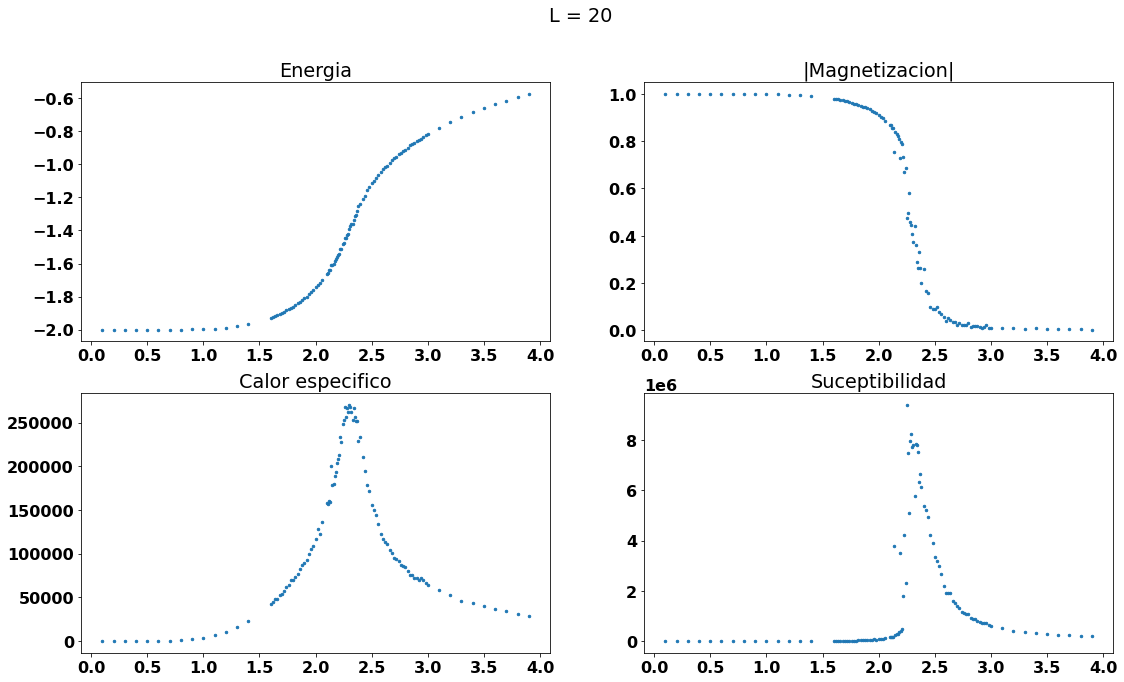

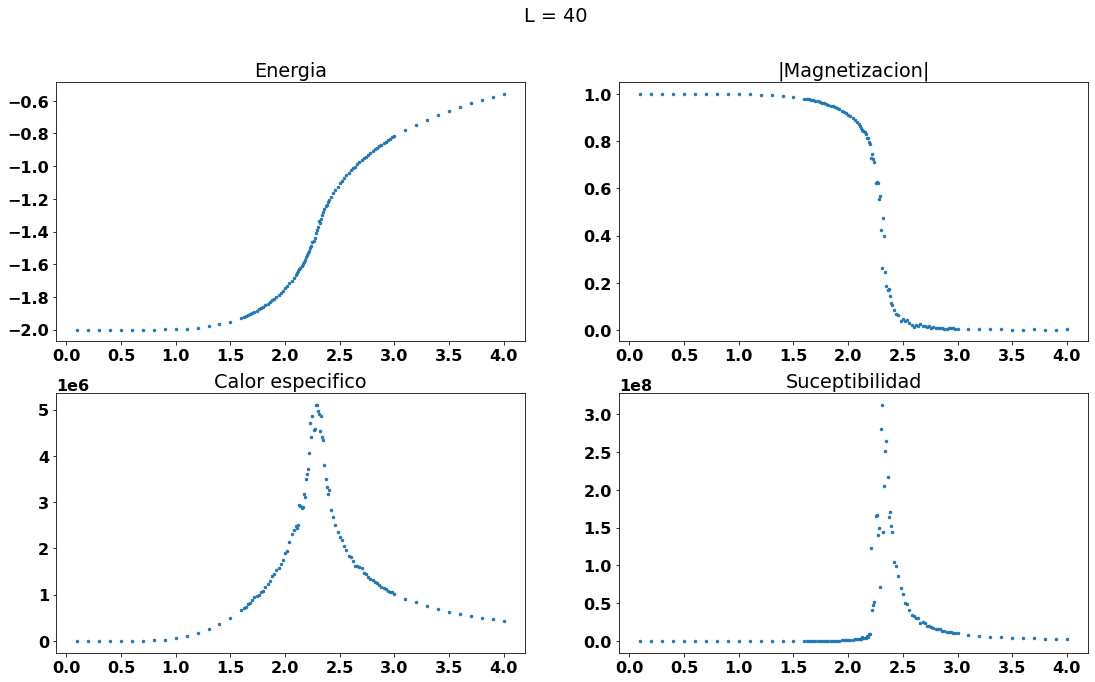

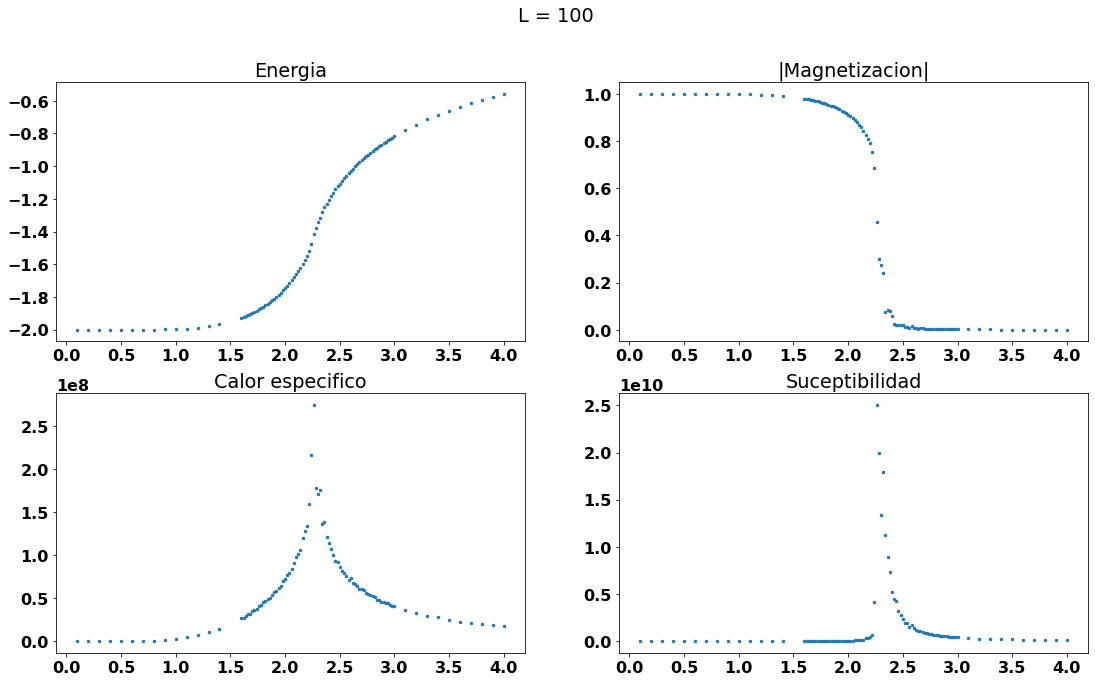

In [21]:
for s in data['size'].unique():
    dataf = data[data['size']==s]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(f'L = {s}')
    plot(ax2, dataf['temperature'], dataf['M'], '|Magnetizacion|')
    plot(ax1, dataf['temperature'], dataf['E'], 'Energia')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')

plt.show()